$y(x) = \sin(0.5 \cdot \ln (x)  \cdot x) + 1 \rightarrow min$ 

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
def f(x):
    return math.sin(0.5 * math.log(x) * x) + 1

def painter_decorator(func):
    def draw(*args):
        p = func(*args)
        xx = np.arange(max(0.1, p - 10), p + 10, 0.05)
        yy = np.array([f(x) for x in xx])
        plt.plot(xx, yy)
        plt.scatter(p, f(p), c='r')
        plt.show()
    return draw

In [3]:
prev_step = 0
debug_list = []

def debug_start(l, r, *args):
    global prev_step, debug_list
    debug_list = [[l, r] + list(args) + [None]]
    prev_step = r - l

def debug_tick(l, r, step, *args):
    global prev_step, debug_list
    attitude = step / prev_step
    prev_step = step
    debug_list.append([l, r] + list(args) + [attitude])

def debug_result(*args):
    global debug_list
    args = list(args) + ['attitude']
    frame = pd.DataFrame(debug_list, columns=args)
    ord_args = args
    r_id = 1
    while r_id < len(args) - 1 and not ord_args[r_id + 1].startswith('f'):
        ord_args[r_id], ord_args[r_id + 1] = ord_args[r_id + 1], ord_args[r_id]
        r_id += 1
            
    return frame[ord_args]

In [4]:
@painter_decorator
def dichotomous_search(l, r, eps, s=1):
    debug_start(l, r, *[0, 0, 0, 0])
    delta = eps / 3
    
    while r - l > eps:
        m = (l + r) * .5
        x1 = m - delta
        x2 = m + delta
        if s*f(x1) > s*f(x2):
            l = x1
        else:
            r = x2
        debug_tick(l, r, r - l, *[x1, x2, f(x1), f(x2)])
    return (l + r) * .5          

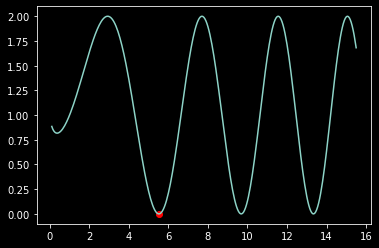

,l,x1,x2,r,f(x1),f(x2),attitude
0,4.0000,0.0000,0.0000,7.0000,0.0000,0.0000,NaN
1,5.4997,5.4997,5.5003,7.0000,0.0003,0.0003,0.5001
2,5.4997,6.2495,6.2502,6.2502,0.4713,0.4721,0.5002
3,5.4997,5.8746,5.8753,5.8753,0.1170,0.1174,0.5004
4,5.4997,5.6871,5.6878,5.6878,0.0264,0.0266,0.5009
5,5.4997,5.5934,5.5941,5.5941,0.0052,0.0053,0.5018
6,5.4997,5.5465,5.5472,5.5472,0.0007,0.0008,0.5035
7,5.4997,5.5231,5.5238,5.5238,0.0000,0.0000,0.5070
8,5.5114,5.5114,5.5120,5.5238,0.0000,0.0000,0.5138
9,5.5172,5.5172,5.5179,5.5238,0.0000,0.0000,0.5269


In [5]:
dichotomous_search(4, 7, 0.001)
debug_result(*['l', 'r', 'x1', 'x2', 'f(x1)', 'f(x2)'])

In [6]:
@painter_decorator
def golden_section_search(l, r, eps, s=1):
    d = lambda: gr * (r - l)
    gr = (math.sqrt(5) - 1) * .5
    x1, x2 = r - d(), l + d()
    f1, f2 = s*f(x1), s*f(x2)
    debug_start(l, r, *[x1, x2, f1, f2])
    while r - l > eps:
        if f1 > f2:
            l, x1, f1 = x1, x2, f2
            x2 = l + d()
            f2 = s*f(x2)
        else:
            r, x2, f2 = x2, x1, f1
            x1 = r - d()
            f1 = s*f(x1)
        debug_tick(l, r, r - l, *[x1, x2, f1, f2])
            
    return (l + r) * .5

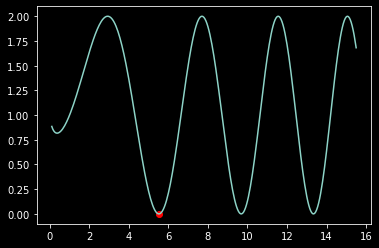

,l,x1,x2,r,f(x1),f(x2),attitude
0,4.0000,5.1459,5.8541,7.0000,0.1212,0.1040,NaN
1,5.1459,5.8541,6.2918,7.0000,0.1040,0.5231,0.6180
2,5.1459,5.5836,5.8541,6.2918,0.0040,0.1040,0.6180
3,5.1459,5.4164,5.5836,5.8541,0.0094,0.0040,0.6180
4,5.4164,5.5836,5.6869,5.8541,0.0040,0.0263,0.6180
5,5.4164,5.5197,5.5836,5.6869,0.0000,0.0040,0.6180
6,5.4164,5.4803,5.5197,5.5836,0.0013,0.0000,0.6180
7,5.4803,5.5197,5.5441,5.5836,0.0000,0.0006,0.6180
8,5.4803,5.5047,5.5197,5.5441,0.0002,0.0000,0.6180
9,5.5047,5.5197,5.5291,5.5441,0.0000,0.0001,0.6180


In [7]:
golden_section_search(4, 7, 0.001)
debug_result(*['l', 'r', 'x1', 'x2', 'f(x1)', 'f(x2)'])

In [8]:
@painter_decorator
def fibonacci_search(l, r, eps, s=1):
    fib = np.array([1, 1])
    while fib[-1] <= (r - l) / eps:
        fib = np.append(fib, fib[-1] + fib[-2])

    d = lambda k: (r - l) * (fib[n - k] / fib[n - k + 1])
    n = len(fib) - 1
    x1, x2 = r - d(1), l + d(1)
    f1, f2 = s*f(x1), s*f(x2)
    debug_start(l, r, *[x1, x2, f1, f2])
    for k in range(1, n):        
        if f1 > f2:
            l, x1, f1 = x1, x2, f2
            x2 = l + d(k)
            f2 = s*f(x2)
        else:
            r, x2, f2 = x2, x1, f1
            x1 = r - d(k)
            f1 = s*f(x1)
        debug_tick(l, r, r - l, *[x1, x2, f1, f2])
    return (l + r) * .5

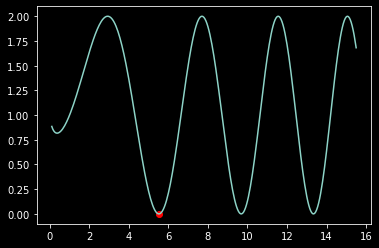

,l,x1,x2,r,f(x1),f(x2),attitude
0,4.0000,5.1459,5.8541,7.0000,0.1212,0.1040,NaN
1,5.1459,5.8541,6.2918,7.0000,0.1040,0.5231,0.6180
2,5.1459,5.5836,5.8541,6.2918,0.0040,0.1040,0.6180
3,5.1459,5.4164,5.5836,5.8541,0.0094,0.0040,0.6180
4,5.4164,5.5836,5.6869,5.8541,0.0040,0.0263,0.6180
5,5.4164,5.5197,5.5836,5.6869,0.0000,0.0040,0.6180
6,5.4164,5.4803,5.5197,5.5836,0.0013,0.0000,0.6180
7,5.4803,5.5197,5.5441,5.5836,0.0000,0.0006,0.6180
8,5.4803,5.5047,5.5197,5.5441,0.0002,0.0000,0.6180
9,5.5047,5.5197,5.5290,5.5441,0.0000,0.0001,0.6181


In [9]:
fibonacci_search(4, 7, 0.001)
debug_result(*['l', 'r', 'x1', 'x2', 'f(x1)', 'f(x2)'])

In [10]:
from scipy.interpolate import lagrange

@painter_decorator
def successive_parabolic_interpolation(l, r, eps, s=1):
    m = (l + r) / 2

    # for lagrange
    xx = np.arange(l, r, 0.05)
    yy = np.array([f(x) for x in xx])
    paraboles = []
    
    f1, f2, f3 = s*f(l), s*f(m), s*f(r)
    debug_start(l, r, *[m, f1, f2, f3])
    while r - l > eps:
        p = ((m - l) ** 2) * (f2 - f3) - ((m - r) ** 2) * (f2 - f1)
        q = 2 * ((m - l) * (f2 - f3) - (m - r) * (f2 - f1))
        u = m - p / q
        fu = s*f(u)
        lagr = lagrange([l, m, r], [f1, f2, f3])
        paraboles.append(s*lagr(xx))
        if m > u:
            if f2 < fu:
                l, f1 = u, fu
            else:
                r, f3 = m, f2
                m, f2 = u, fu
        else:
            if f2 > fu:
                l, f1 = m, f2
                m, f2 = u, fu
            else:
                r, f3 = u, fu
        debug_tick(l, r, r - l, *[m, f1, f2, f3])
        
    p = (l + r) / 2
    plt.scatter(p, f(p), c='r')
    for i in paraboles:
        plt.plot(xx, i, c='w', linestyle='--', alpha=.3)
    plt.plot(xx, yy)
    plt.show()
    return p

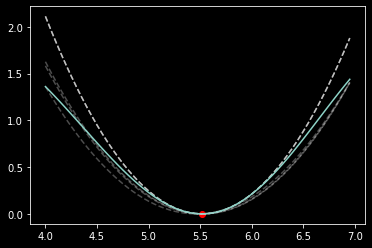

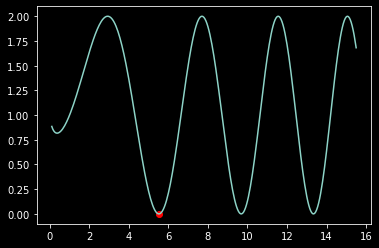

,l,m,r,f(l),f(m),f(r),attitude
0,4.0000,5.5000,7.0000,1.3607,0.0003,1.5034,NaN
1,5.4626,5.5000,7.0000,0.0028,0.0003,1.5034,0.5125
2,5.5000,5.5294,7.0000,0.0003,0.0001,1.5034,0.9757
3,5.5000,5.5191,5.5294,0.0003,0.0000,0.0001,0.0196
4,5.5000,5.5180,5.5191,0.0003,0.0000,0.0000,0.6479
5,5.5180,5.5180,5.5191,0.0000,0.0000,0.0000,0.0575
6,5.5180,5.5180,5.5191,0.0000,0.0000,0.0000,0.9940
7,5.5180,5.5180,5.5180,0.0000,0.0000,0.0000,0.0006


In [11]:
successive_parabolic_interpolation(4, 7, 0.001)
debug_result(*['l', 'r', 'm', 'f(l)', 'f(m)', 'f(r)'])

In [12]:
@painter_decorator
def brents_method(l, r, eps, s=1):
    gr = (math.sqrt(5) - 1) / 2
    m = w = v = l + gr * (r - l)
    fm = fw = fv = s*f(m)
    d = e = 0
    u = float('+inf')
    algo_type = None
    debug_start(l, r, *[m, w, v, fm, fw, fv, algo_type])
    while r - l > eps:
        g, e = e, d
        if len({m, w, v}) == len({fm, fw, fv}) == 3:
            p = ((m - w) ** 2) * (fm - fv) - ((m - v) ** 2) * (fm - fw)
            q = 2 * ((m - w) * (fm - fv) - (m - v) * (fm - fw))
            u = m - p / q
        
        if l + eps <= u <= r - eps and 2 * abs(u - m) < g:
            algo_type = 'spi'
            d = abs(u - m)        
        else:
            algo_type = 'gss'
            if m < (r + l) * .5:
                d = r - m
                u = m + gr * d
            else:            
                d = m - l
                u = m - gr * d
        
        if abs(u - m) < eps:
            u = m + np.sign(u - m) * eps * .5
        
        fu = s*f(u)

        if fu <= fm:
            if u >= m:
                l = m
            else:
                r = m
            v, w, m = w, m, u
            fv, fw, fm = fw, fm, fu
            
        else:
            if u >= m:
                r = u
            else:
                l = u
            
            if fu <= fw or w == m:
                v, w = w, u
                fv, fw = fw, fu
            elif fu <= fv or v == m or v == w:
                v = u
                fv = fu

        debug_tick(l, r, d, *[m, w, v, fm, fw, fv, algo_type])
            
    return (l + r) / 2

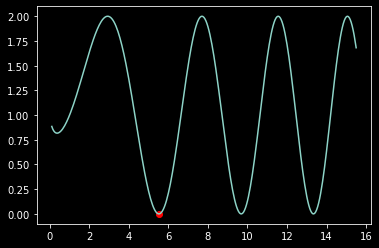

,l,m,w,v,r,f(m),f(w),f(v),algo_type,attitude
0,4.0000,5.8541,5.8541,5.8541,7.0000,0.1040,0.1040,0.1040,None,NaN
1,4.7082,5.8541,4.7082,5.8541,7.0000,0.1040,0.5156,0.1040,gss,0.6180
2,5.1459,5.8541,5.1459,4.7082,7.0000,0.1040,0.1212,0.5156,gss,0.6180
3,5.1459,5.5158,5.8541,5.1459,5.8541,0.0000,0.1040,0.1212,spi,0.2952
4,5.5135,5.5158,5.5135,5.8541,5.8541,0.0000,0.0000,0.1040,spi,0.0069
5,5.5158,5.5180,5.5158,5.5135,5.8541,0.0000,0.0000,0.0000,spi,0.9211
6,5.5158,5.5180,5.5185,5.5158,5.5185,0.0000,0.0000,0.0000,spi,0.0071
7,5.5166,5.5180,5.5185,5.5166,5.5185,0.0000,0.0000,0.0000,gss,140.1033
8,5.5175,5.5180,5.5185,5.5175,5.5185,0.0000,0.0000,0.0000,gss,0.6180


In [13]:
brents_method(4, 7, 0.001)
debug_result(*['l', 'r', 'm', 'w', 'v', 'f(m)', 'f(w)', 'f(v)', 'algo_type'])